In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/trx_data - Sheet1.csv')

In [ ]:
data['date'] = pd.to_datetime(data['date'])

# Defining duplicates based on a combination of fields
duplicate_fields = ['invoice_id', 'customer_id', 'product_line', 'total']

In [ ]:
# Checking for duplicates
duplicates = data[data.duplicated(subset=duplicate_fields, keep=False)]

In [ ]:
number_of_duplicates = duplicates.shape[0]
print(f"Number of duplicate entries: {number_of_duplicates}")

Number of duplicate entries: 74


In [ ]:
duplicates.sort_values(by='invoice_id')

,invoice_id,customer_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax,total,date,time,payment,cogs,gross_margin_ratio,gross_income,rating
931,109-86-4363,141,B,Mandalay,Member,Female,Sports and travel,"60,08",7,"21,028","441,588",2019-02-14,11:36,Credit card,"420,56","4,761904762","21,028","4,5"
925,109-86-4363,141,B,Mandalay,Member,Female,Sports and travel,"60,08",7,"21,028","441,588",2019-02-14,11:36,Credit card,"420,56","4,761904762","21,028","4,5"
5,133-14-7229,177,C,Naypyitaw,Normal,Male,Health and beauty,"62,87",2,"6,287","132,027",2019-01-01,11:43,Cash,"125,74","4,761904762","6,287",5
16,133-14-7229,177,C,Naypyitaw,Normal,Male,Health and beauty,"62,87",2,"6,287","132,027",2019-01-01,11:43,Cash,"125,74","4,761904762","6,287",5
26,198-84-7132,125,B,Mandalay,Member,Male,Fashion accessories,"40,61",9,"18,2745","383,7645",2019-01-02,13:40,Cash,"365,49","4,761904762","18,2745",7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,843-01-4703,144,B,Mandalay,Member,Female,Home and lifestyle,"35,38",9,"15,921","334,341",2019-01-05,19:50,Credit card,"318,42","4,761904762","15,921","9,6"
675,845-51-0542,138,B,Mandalay,Member,Male,Food and beverages,"46,55",9,"20,9475","439,8975",2019-02-02,15:34,Ewallet,"418,95","4,761904762","20,9475","6,4"
664,845-51-0542,138,B,Mandalay,Member,Male,Food and beverages,"46,55",9,"20,9475","439,8975",2019-02-02,15:34,Ewallet,"418,95","4,761904762","20,9475","6,4"
1591,850-41-9669,33,A,Yangon,Normal,Female,Electronic accessories,"75,06",9,"33,777","709,317",2019-03-19,13:25,Ewallet,"675,54","4,761904762","33,777","6,2"


In [ ]:
# Remove duplicates but keep the first instance
data = data.drop_duplicates(subset=duplicate_fields, keep='first')

# Verify the cleanup by checking the new size of the dataset
print(f"Data size after removing duplicates: {data.shape[0]}")

Data size after removing duplicates: 1789


In [ ]:
data.sort_values(by=['invoice_id', 'customer_id'], ascending=[True, True], inplace=True)

<ipython-input-8-9c3b4bafd6ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(by=['invoice_id', 'customer_id'], ascending=[True, True], inplace=True)


In [ ]:
data.head()

,invoice_id,customer_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax,total,date,time,payment,cogs,gross_margin_ratio,gross_income,rating
1473,101-17-6199,8,A,Yangon,Normal,Male,Food and beverages,"45,79",7,"16,0265","336,5565",2019-03-13,19:44,Credit card,"320,53","4,761904762","16,0265",7
325,101-81-4070,232,C,Naypyitaw,Member,Female,Health and beauty,"62,82",2,"6,282","131,922",2019-01-17,12:36,Ewallet,"125,64","4,761904762","6,282","4,9"
315,101-81-4070,236,C,Naypyitaw,Member,Female,Health and beauty,"62,82",2,"6,282","131,922",2019-01-17,12:36,Ewallet,"125,64","4,761904762","6,282","4,9"
1645,102-06-2002,205,C,Naypyitaw,Member,Male,Sports and travel,"25,25",5,"6,3125","132,5625",2019-03-20,17:52,Cash,"126,25","4,761904762","6,3125","6,1"
1630,102-06-2002,215,C,Naypyitaw,Member,Male,Sports and travel,"25,25",5,"6,3125","132,5625",2019-03-20,17:52,Cash,"126,25","4,761904762","6,3125","6,1"


## Transaksi selama bulan Maret

In [ ]:
data['date'] = pd.to_datetime(data['date'])

# Extract the month from the date
data['month'] = data['date'].dt.month

# hitung transaksi di bulan March (3) dan February (2)
transactions_in_march = data[data['month'] == 3].shape[0]
transactions_in_february = data[data['month'] == 2].shape[0]

In [ ]:
print(f"March Transactions: {transactions_in_march}")

March Transactions: 613


In [ ]:
print(transactions_in_february)

538


In [ ]:
if transactions_in_february > 0:  # To avoid division by zero
    percentage_increase = ((transactions_in_march - transactions_in_february) / transactions_in_february) * 100
else:
    percentage_increase = float('inf')

In [ ]:
print(f"Monthly Percentage Increase on March: {percentage_increase:.2f}%")

Monthly Percentage Increase on March: 13.94%


## Branch with highest rating in 2019 Q1

In [ ]:
q1_2019_data = data[(data['date'].dt.year == 2019) & (data['date'].dt.month.isin([1, 2, 3]))]

In [ ]:
# data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

In [ ]:
data['rating'] = data['rating'].str.replace(',', '.').astype(float)

In [ ]:
branch_ratings = data.groupby('branch')['rating'].mean()

In [ ]:
branch_ratings

branch
A    7.022386
B    6.834391
C    7.061419
Name: rating, dtype: float64

In [ ]:
highest_rating_branch = branch_ratings.idxmax()
highest_rating_value = branch_ratings.max()

print(f"The branch with the highest average rating is {highest_rating_branch} with a rating of {highest_rating_value:.2f}")

The branch with the highest average rating is C with a rating of 7.06


## Toko cabang dengan keuntungan terbesar

In [ ]:
branch_profits = data.groupby('branch')['gross_income'].sum()

In [ ]:
branch_profits

branch
A    16,02652,1482,14824,3324,43423,28811,938511,93...
B    29,28321,0286,5246,52423,16423,16419,155519,15...
C    6,2826,2826,31256,312522,858522,858511,82911,8...
Name: gross_income, dtype: object

In [ ]:
print(data['gross_income'].unique())

['16,0265' '6,282' '6,3125' '22,8585' '2,148' '24,332' '4,434' '29,283'
 '21,028' '11,829' '6,524' '23,164' '4,072' '19,1555' '15,676' '9,183'
 '7,215' '23,094' '23,288' '20,997' '11,9385' '29,73' '9,693' '10,342'
 '15,655' '14,55' '22,491' '29,008' '13,8135' '5,2425' '18,792' '6,287'
 '12,036' '16,968' '6,762' '7,888' '35,0685' '27,984' '29,38' '4,876'
 '40,1445' '20,15' '43,866' '7,8785' '23,09' '9,32' '14,148' '22,09'
 '15,768' '34,986' '6,06' '11,4' '16,794' '32,095' '35,1315' '6,6975'
 '6,45' '11,226' '3,3885' '5,076' '28,962' '7,83' '14,978' '2,7225'
 '26,104' '35,42' '1,2725' '11,078' '25,97' '23,9875' '11,1475' '3,449'
 '2,4355' '26,718' '2,3535' '3,827' '4,036' '7,288' '18,975' '9,937'
 '34,87' '9,711' '8,868' '4,848' '5,0715' '4,911' '6,933' '5,408' '4,73'
 '11,9865' '34,9335' '19,884' '4,0755' '4,768' '7,954' '25,1195' '4,154'
 '33,235' '14,2785' '8,767' '33,7295' '34,8425' '31,09' '35,3475' '3,594'
 '11,79' '13,867' '9,885' '0,639' '12,1515' '25,683' '36,624' '7,204'
 '18,2

In [ ]:
print(data['gross_income'].describe())

count      1789
unique      990
top       4,464
freq          4
Name: gross_income, dtype: object


In [ ]:
data['gross_income'] = data['gross_income'].str.replace(',', '.').astype(float)
data['tax'] = data['tax'].str.replace(',', '.').astype(float)
data['total'] = data['total'].str.replace(',', '.').astype(float)
data['cogs'] = data['cogs'].str.replace(',', '.').astype(float)
data['unit_price'] = data['unit_price'].str.replace(',', '.').astype(float)
data['gross_margin_ratio'] = data['gross_margin_ratio'].str.replace(',', '.').astype(float)

In [ ]:
data['calculated_profit'] = data['total'] - data['cogs'] - data['tax']

In [ ]:
data.head()

,invoice_id,customer_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax,total,date,time,payment,cogs,gross_margin_ratio,gross_income,rating,month,calculated_profit
1473,101-17-6199,8,A,Yangon,Normal,Male,Food and beverages,45.79,7,16.0265,336.5565,2019-03-13,19:44,Credit card,320.53,4.761905,16.0265,7.0,3,5.684342e-14
325,101-81-4070,232,C,Naypyitaw,Member,Female,Health and beauty,62.82,2,6.2820,131.9220,2019-01-17,12:36,Ewallet,125.64,4.761905,6.2820,4.9,1,-3.552714e-15
315,101-81-4070,236,C,Naypyitaw,Member,Female,Health and beauty,62.82,2,6.2820,131.9220,2019-01-17,12:36,Ewallet,125.64,4.761905,6.2820,4.9,1,-3.552714e-15
1645,102-06-2002,205,C,Naypyitaw,Member,Male,Sports and travel,25.25,5,6.3125,132.5625,2019-03-20,17:52,Cash,126.25,4.761905,6.3125,6.1,3,0.000000e+00
1630,102-06-2002,215,C,Naypyitaw,Member,Male,Sports and travel,25.25,5,6.3125,132.5625,2019-03-20,17:52,Cash,126.25,4.761905,6.3125,6.1,3,0.000000e+00


In [ ]:
data.to_csv('modified_trx_data.csv', index=False)

In [ ]:
branch_profits = data.groupby('branch')['calculated_profit'].sum()
highest_profit_branch = branch_profits.idxmax()
highest_profit_value = branch_profits.max()

In [ ]:
print(f"The branch with the highest calculated profit is {highest_profit_branch} with a profit of {highest_profit_value}")

The branch with the highest calculated profit is A with a profit of -4.3853809472693683e-14


## 3 Customer dengan nilai pembelian terbesar di setiap cabang

In [ ]:
customer_spending = data.groupby(['branch', 'customer_id'])['total'].sum().reset_index()

In [ ]:
customer_spending.head()

,branch,customer_id,total
0,A,1,1521.5025
1,A,2,731.4825
2,A,3,1428.4725
3,A,4,2681.5320
4,A,5,1881.9675


In [ ]:
top_customers = customer_spending.sort_values(by=['branch', 'total'], ascending=[True, False])

In [ ]:
top_customers = top_customers.groupby('branch').head(3)

In [ ]:
top_customers

,branch,customer_id,total
43,A,44,5141.1780
8,A,9,4783.5165
21,A,22,4683.2625
130,B,131,4766.8005
142,B,143,4689.3735
113,B,114,4278.8130
232,C,233,5958.4350
231,C,232,5428.4160
163,C,164,5344.1430


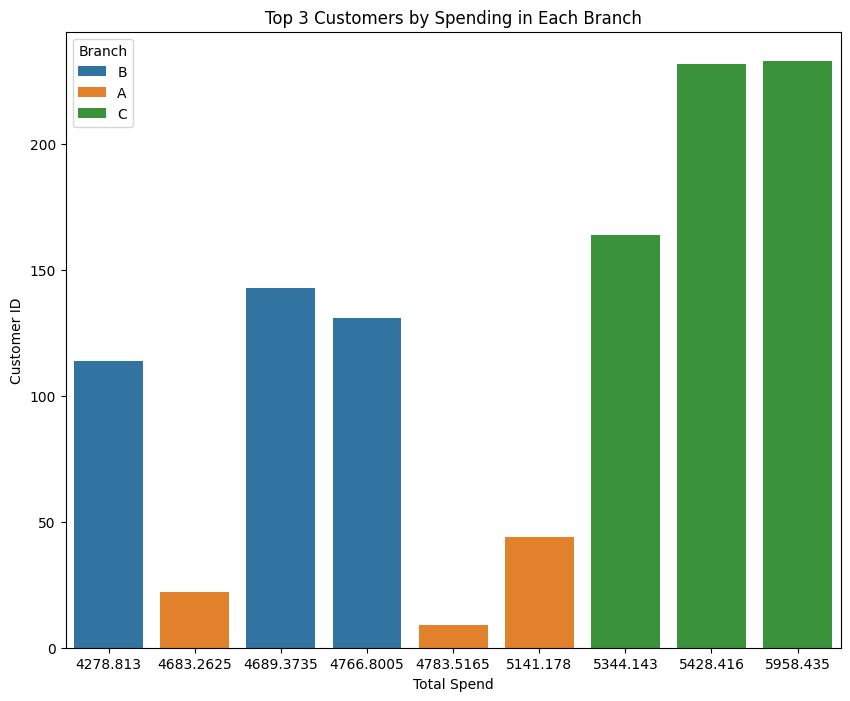

In [ ]:
# membuat visualisasi top 3 customers hanya untuk melihat
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for the top 3 customers in each branch
plt.figure(figsize=(10, 8))
sns.barplot(x='total', y='customer_id', hue='branch', data=top_customers, dodge=False)
plt.title('Top 3 Customers by Spending in Each Branch')
plt.xlabel('Total Spend')
plt.ylabel('Customer ID')
plt.legend(title='Branch')
plt.show()

# User Lifetime Value

### Ekspektasi frekuensi belanja yang diharapkan setiap konsumen untuk 3 bulan kedepan (BG-NBD)

In [ ]:
pip install lifetimes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from lifetimes.utils import summary_data_from_transaction_data

# Assuming 'data' is your DataFrame, 'date' is the column with the transaction dates,
# 'customer_id' identifies the customer, and 'total' is the transaction amount.
data['date'] = pd.to_datetime(data['date'])

# Create a summary data frame suitable for lifetime analysis
summary = summary_data_from_transaction_data(data, 'customer_id', 'date',
                                             observation_period_end='2019-3-30',
                                             monetary_value_col='total')

print(summary.head())

             frequency  recency     T  monetary_value
customer_id                                          
1                  8.0     50.0  70.0      154.613812
2                  4.0     62.0  83.0      115.051125
3                  6.0     44.0  72.0      152.421500
4                  8.0     73.0  81.0      310.818375
5                  4.0     58.0  78.0      446.948250


In [ ]:
from lifetimes import BetaGeoFitter

# Fit the BG/NBD model
bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(summary['frequency'], summary['recency'], summary['T'])


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


<lifetimes.BetaGeoFitter: fitted with 240 subjects, a: 0.00, alpha: 150044500.84, b: 546952056.65, r: 11990246.59>

In [ ]:
# Predict expected purchases for the next 3 months
summary['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(3, summary['frequency'], summary['recency'], summary['T'])

# print(summary.sort_values(by='predicted_purchases', ascending=False).head())
print(summary.sort_values(by='predicted_purchases', ascending=False))


             frequency  recency     T  monetary_value  predicted_purchases
customer_id                                                               
44                13.0     74.0  87.0      375.286154             0.239734
9                 13.0     84.0  86.0      339.689538             0.239734
143               12.0     70.0  80.0      385.032375             0.239734
151               12.0     74.0  80.0      291.589375             0.239734
232               12.0     84.0  84.0      449.576750             0.239734
...                ...      ...   ...             ...                  ...
112                2.0     24.0  84.0      350.196000             0.239734
36                 2.0     65.0  65.0      358.128750             0.239734
71                 1.0     44.0  53.0      232.774500             0.239734
202                1.0     53.0  67.0       32.277000             0.239734
123                1.0     72.0  83.0      163.002000             0.239734

[240 rows x 5 columns]


**Frequency**: Shows the number of repeat purchases each customer has made. For example, customer_id 44 has made 13 repeat purchases. This does not include the initial purchase, so the total number of transactions for this customer would be 14.

**Recency**: Indicates the age of the customer in weeks at the time of their last purchase relative to their first purchase. For instance, customer 44’s last purchase was made in the 74th week since their first purchase.

**T (Age of the Customer in Weeks)**: This represents the total age of the customer in weeks from their first purchase until the end of the observation period (which was the cutoff date you used when preparing the data). For customer 44, this is 87 weeks.

**Monetary Value**: This is the average value of transactions for each customer. For customer 44, the average transaction value is approximately $375.29. This field is particularly useful for understanding the spending level or value each customer brings.

**Predicted Purchases**: The expected number of purchases the customer is likely to make in the next 3 months, based on their historical data. For all the customers shown, the model predicts about 0.239 purchases in the next three months. This low number might indicate infrequent purchasing behavior or could be influenced by the model’s sensitivity to the historical data’s pattern.

**Customer Engagement**: Customers 44 and 9, with the highest recency (74 and 84 weeks, respectively), are potentially the most engaged, indicating recent interactions with the business. Marketing efforts could be directed towards encouraging more frequent interactions or higher-value transactions from them.

**Predicted Purchases**: The uniformly low predicted purchases across customers suggest either a generally low frequency of purchases across your customer base or a conservative estimate by the model. If your business cycle involves infrequent but high-value purchases, this might be expected. Otherwise, consider initiatives to increase purchase frequency.



In [ ]:
print(summary.sort_values(by='predicted_purchases', ascending=False))

             frequency  recency     T  monetary_value  predicted_purchases
customer_id                                                               
44                13.0     74.0  87.0      375.286154             0.239734
9                 13.0     84.0  86.0      339.689538             0.239734
143               12.0     70.0  80.0      385.032375             0.239734
151               12.0     74.0  80.0      291.589375             0.239734
232               12.0     84.0  84.0      449.576750             0.239734
...                ...      ...   ...             ...                  ...
112                2.0     24.0  84.0      350.196000             0.239734
36                 2.0     65.0  65.0      358.128750             0.239734
71                 1.0     44.0  53.0      232.774500             0.239734
202                1.0     53.0  67.0       32.277000             0.239734
123                1.0     72.0  83.0      163.002000             0.239734

[240 rows x 5 columns]


In [ ]:
print(summary.sort_values(by=['customer_id'], ascending=True))

             frequency  recency     T  monetary_value  predicted_purchases
customer_id                                                               
1                  8.0     50.0  70.0      154.613812             0.239734
2                  4.0     62.0  83.0      115.051125             0.239734
3                  6.0     44.0  72.0      152.421500             0.239734
4                  8.0     73.0  81.0      310.818375             0.239734
5                  4.0     58.0  78.0      446.948250             0.239734
...                ...      ...   ...             ...                  ...
236                5.0     52.0  72.0      426.239100             0.239734
237                8.0     76.0  88.0      271.973625             0.239734
238                6.0     76.0  88.0      434.273000             0.239734
239                4.0     79.0  81.0      334.356750             0.239734
240               10.0     75.0  86.0      273.617400             0.239734

[240 rows x 5 columns]


# Ekspektasi nilai yang dihasilkan untuk setiap konsumen untuk 3 bulan ke depan (Gamma-Gamma)


In [ ]:
from lifetimes import GammaGammaFitter

In [ ]:
# Assuming 'summary' is your DataFrame created from the BG-NBD model preparation
repeat_customers = summary[summary['frequency'] > 0]

# Fitting the Gamma-Gamma model
ggf = GammaGammaFitter(penalizer_coef=0.01)
ggf.fit(repeat_customers['frequency'], repeat_customers['monetary_value'])

<lifetimes.GammaGammaFitter: fitted with 240 subjects, p: 3.83, q: 0.34, v: 3.79>

In [ ]:
print("Model Parameters:")
print(f"p: {ggf.params_['p']}")
print(f"q: {ggf.params_['q']}")
print(f"v: {ggf.params_['v']}")

Model Parameters:
p: 3.834445246503894
q: 0.3407310539769233
v: 3.7904361564859164


In [ ]:
summary['predicted_monetary_value'] = ggf.conditional_expected_average_profit(
    summary['frequency'],
    summary['monetary_value']
)

In [ ]:
# Resetting the index to turn 'customer_id' back into a column
summary = summary.reset_index()

# Now 'customer_id' is a regular column and you can access it as such
print(summary[['customer_id', 'predicted_monetary_value']])


     customer_id  predicted_monetary_value
0              1                158.493915
1              2                121.208687
2              3                157.568451
3              4                318.129309
4              5                468.012600
..           ...                       ...
235          236                442.203077
236          237                278.431384
237          238                447.734830
238          239                350.364179
239          240                278.789769

[240 rows x 2 columns]
